# Logistic Regression Analysis: Predicting Admission Based on SAT Scores and Gender

## Introduction

This notebook explores the relationship between SAT scores, gender, and admission status using logistic regression. The objective is to understand how these predictors influence the probability of admission and to evaluate the model's performance through statistical analysis. We will analyze how well SAT scores and gender can predict whether a student is admitted or not.

## 1. Importing Libraries

Before we begin our analysis, we need to import the necessary libraries for data manipulation and statistical modeling.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## 2. Loading the Data
Next, we load our dataset which contains information about SAT scores, admission status, and gender.

In [2]:
raw_data = pd.read_csv('SAT_Admitted_Gender.csv')
data = raw_data.copy()
data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


### Data Overview
The dataset includes the following columns and desired transformations:
- **SAT**: Students' SAT scores.
- **dmitted**: Admission status (0 = Not Admitted, 1 = Admitted).
- **Gender**: Gender of the applicant (Female and Male, it is irelevant to define the binary value specifically).

## 3. Data Preprocessing
In this section, we will preprocess the data by mapping categorical variables to binary values and preparing it for logistic regression analysis.

In [3]:
def boolean_mapping(data, columns_list, custom_mappings=None):
    """
    Map boolean or categorical data in specified columns to binary values.

    Parameters:
    data : pd.DataFrame
        Input dataframe containing columns to be mapped.
    columns_list : list
        List of column names to apply boolean mapping.
    custom_mappings : dict, optional
        Dictionary of custom mappings for specific columns.
        Default is None, which applies automatic mapping.

    Returns:
    mapped_data : pd.DataFrame
        DataFrame with boolean columns mapped to binary values.
    mapping_dict : dict
        Dictionary containing the mappings applied to each column.
    """
    mapped_data = data.copy()
    mapping_dict = {}
    
    for column in columns_list:
        unique_values = data[column].unique()
        if len(unique_values) == 2:
            if custom_mappings and column in custom_mappings:
                mapping = custom_mappings[column]
            else:
                mapping = {unique_values[0]: 1, unique_values[1]: 0}
            mapped_data[column] = data[column].map(mapping)
            mapping_dict[column] = mapping
    
    return mapped_data, mapping_dict

custom_map = {'Admitted': {'No': 0, 'Yes': 1}}
train_data, mapping_dict = boolean_mapping(data, ['Admitted', 'Gender'], custom_mappings=custom_map)
print(mapping_dict)
train_data

{'Admitted': {'No': 0, 'Yes': 1}, 'Gender': {'Male': 1, 'Female': 0}}


,SAT,Admitted,Gender
0,1363,0,1
1,1792,1,0
2,1954,1,0
3,1653,0,1
4,1593,0,1
...,...,...,...
163,1722,1,0
164,1750,1,1
165,1555,0,1
166,1524,0,1


In [4]:
# when applying the same mapping for new data we can use this function 
def apply_mapping(new_data, mapping_dict):
    """
    Apply previously defined boolean mappings to new data.

    Parameters:
    new_data : pd.DataFrame
        New dataset to which the mapping should be applied.
    mapping_dict : dict
        Dictionary of mappings to be applied, typically from boolean_mapping function.

    Returns:
    new_mapped_data : pd.DataFrame
        New dataframe with boolean columns mapped to binary values.
    """
    new_mapped_data = new_data.copy()
    for column, mapping in mapping_dict.items():
        if column in new_mapped_data.columns:
            new_mapped_data[column] = new_mapped_data[column].map(mapping)
    return new_mapped_data


## 4. Model Fitting
We will fit a logistic regression model using SAT scores and gender as predictors for admission status.

In [5]:
# Define independent variables (X) and dependent variable (y)
y = train_data['Admitted']
x1 = train_data[['SAT','Gender']]

# Add a constant to the model (intercept)
x = sm.add_constant(x1)

# Fit the logistic regression model
results_log = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


## 5. Plotting Logistic Functions

In this section, we will visualize the logistic regression functions for predicting admission probabilities based on SAT scores and gender. Plotting these functions helps us understand how the probability of admission changes with varying SAT scores for different genders.

The logistic function is defined as:

$$

P(Y=1 | X) = \frac{e^{(b_0 + b_1 \cdot X_1 + b_2 \cdot X_2)}}{1 + e^{(b_0 + b_1 \cdot X_1 + b_2 \cdot X_2)}}
$$

Where:
- $P(Y=1 | X)$ is the probability of the outcome (admission) given the predictors $X$.
- $b_0$ is the intercept of the model.
- $b_1$ is the coefficient for the first predictor (SAT score).
- $b_2$ is the coefficient for the second predictor (Gender).
- $X_1$ represents SAT scores.
- $X_2$ represents gender, which is treated as a binary variable.

In our analysis:
- The logistic function will be used to calculate the probability of admission based on SAT scores for both females and males.
- We will plot these probabilities to visually compare how gender influences admission likelihood at different SAT score levels.

Now, let's proceed to plot these logistic functions.

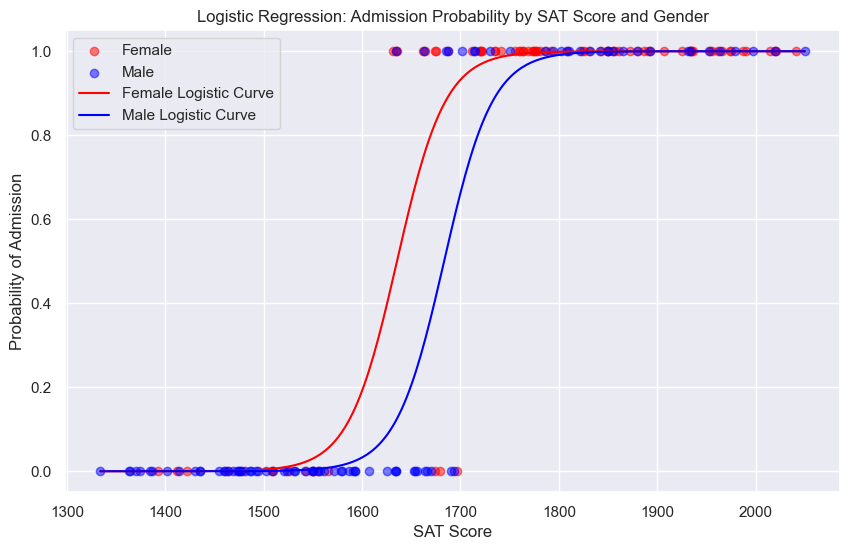

In [6]:
# Define the logistic function
def logistic(x, b0, b1, b2):
    return np.exp(b0 + b1*x + b2) / (1 + np.exp(b0 + b1*x + b2))

# Create a range of SAT scores for plotting
sat_range = np.linspace(train_data['SAT'].min(), train_data['SAT'].max(), 300)

# Calculate probabilities for each gender
prob_female = logistic(sat_range, results_log.params.iloc[0], results_log.params.iloc[1], results_log.params.iloc[2] * 0)
prob_male = logistic(sat_range, results_log.params.iloc[0], results_log.params.iloc[1], results_log.params.iloc[2] * 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(train_data[train_data['Gender'] == 0]['SAT'], train_data[train_data['Gender'] == 0]['Admitted'], color='red', alpha=0.5, label='Female')
plt.scatter(train_data[train_data['Gender'] == 1]['SAT'], train_data[train_data['Gender'] == 1]['Admitted'], color='blue', alpha=0.5, label='Male')
plt.plot(sat_range, prob_female, color='red', label='Female Logistic Curve')
plt.plot(sat_range, prob_male, color='blue', label='Male Logistic Curve')
plt.xlabel('SAT Score')
plt.ylabel('Probability of Admission')
plt.title('Logistic Regression: Admission Probability by SAT Score and Gender')
plt.legend()
plt.show()

## 6. Results
### Model Summary
The summary output provides key metrics such as coefficients, p-values, and pseudo R-squared values that help evaluate model performance.

In [7]:
# Display model summary
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                  0.8249
Time:                        22:33:29   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.4040     16.321     -4.068      0.000     -98.394     -34.414
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender        -1.9449      0.846     -2.299      0.022      -3.603      -0.287
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Confusion Matrix
We will create a confusion matrix to assess the accuracy of our predictions.

In [8]:
#In case we want to see the predicted values of additance for the training data
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
#np.set_printoptions(formatter=None)
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [9]:
np.array(train_data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [10]:
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [11]:
#Improve readability of the confusion matrix
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [12]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

## Discussion
### Statistical Significance
The results indicate that both SAT scores and gender are statistically significant predictors of admission status. The low p-values suggest strong evidence against the null hypothesis.
### Model Performance
The high pseudo R-squared value indicates that our model explains a significant portion of the variance in admission outcomes. The accuracy derived from the confusion matrix further supports this conclusion.
### Predictive Insights
Both predictors show meaningful relationships with admission probability. Higher SAT scores correlate with increased chances of admission.

## 7. Testing the model and assessing its accuracy

In [13]:
# Load the test dataset
test_raw_data = pd.read_csv('SAT_Admitted_Gender_test.csv')
#Apply the same mapping as the train data
test_data = apply_mapping(test_raw_data, mapping_dict)
test_data


,SAT,Admitted,Gender
0,1323,0,1
1,1725,1,0
2,1762,1,0
3,1777,1,1
4,1665,0,1
5,1556,1,0
6,1731,1,0
7,1809,1,0
8,1930,1,0
9,1708,1,1


In [14]:
# Check how the inputs should look like
x

,const,SAT,Gender
0,1.0,1363,1
1,1.0,1792,0
2,1.0,1954,0
3,1.0,1653,1
4,1.0,1593,1
...,...,...,...
163,1.0,1722,0
164,1.0,1750,1
165,1.0,1555,1
166,1.0,1524,1


In [15]:
def confusion_matrix_test(data, predictions_target, model):
    """
    Confusion matrix 
    
    Parameters
    ----------
    data: pd.DataFrame
        A DataFrame containing all mapped data, including features and the target variable.
    predictions_target: str
        The name of the column in 'data' that contains the actual values (e.g., 'Admitted').
        
    model: LogitResults object
        This is the fitted model variable (e.g., results_log).
    """
    
    # Get the actual values (true values; targets)
    actual_values = data[predictions_target]
    
    # Prepare the test data to be predicted by dropping the target column
    test_data = data.drop(columns=[predictions_target])
    test_data = sm.add_constant(test_data)  # Add constant for intercept

    # Predict the values using the Logit model
    pred_values = model.predict(test_data)
    
    # Specify the bins 
    bins = np.array([0, 0.5, 1])
    
    # Create a histogram, where if values are between 0 and 0.5 they will be considered 0,
    # if they are between 0.5 and 1, they will be considered 1
    cm = np.histogram2d(actual_values, pred_values > 0.5, bins=bins)[0]
    
    # Calculate the accuracy
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    
    # Improve readability of the confusion matrix
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0', 'Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0', 1: 'Actual 1'})

    # Capture the name of the DataFrame variable (data) used in the function
    data_name = [name for name in globals() if globals()[name] is data][0]

    print(f'The accuracy of the trained model for {data_name} is: {accuracy * 100:.2f}%')

    # Return the confusion matrix and the accuracy
    return cm_df, accuracy

Now we can easily compare the two data sets

In [19]:
# Create a confusion matrix with the test data
test_cm_df, test_accuracy = confusion_matrix_test(test_data,'Admitted',results_log)
test_cm_df

The accuracy of the trained model for test_data is: 89.47%


,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [17]:
train_df, train_accuracy= confusion_matrix_test(train_data,'Admitted',results_log)
train_df

The accuracy of the trained model for train_data is: 94.64%


,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [18]:
# Check the missclassification rate
# Note that Accuracy + Missclassification rate = 1 = 100%
print(f'Missclassification rate for: train data {(1-test_accuracy)*100:.2f}% VS test data {(1-train_accuracy)*100:.2f}%')

Missclassification rate for: train data 10.53% VS test data 5.36%


## Discussion

The results from our logistic regression model provide valuable insights into its predictive performance on both the training and test datasets. 

### Accuracy Metrics
- **Test Data Accuracy**: The model achieved an accuracy of **89.47%** on the test dataset. This indicates that the model correctly classified approximately 89 out of every 100 instances. The confusion matrix for the test data shows that there were 5 true negatives (correctly predicted as not admitted), 12 true positives (correctly predicted as admitted), 1 false negative (incorrectly predicted as not admitted), and 1 false positive (incorrectly predicted as admitted).
  
- **Train Data Accuracy**: The model performed slightly better on the training dataset, achieving an accuracy of **94.64%**. The confusion matrix for the training data indicates that there were 69 true negatives, 90 true positives, 5 false positives, and 4 false negatives. This suggests that the model is well-calibrated for the training data.

### Misclassification Rates
The misclassification rates provide additional context to the accuracy metrics:
- For the **train data**, the misclassification rate is **5.36%**, indicating that a small percentage of instances were incorrectly classified.
- For the **test data**, the misclassification rate is higher at **10.53%**, suggesting that the model may not generalize as well to unseen data compared to how it performs on training data.

These results highlight a common challenge in machine learning: while a model may perform well on training data, it can sometimes struggle with new, unseen data due to overfitting or other factors.

## Overall Discussion

The logistic regression analysis conducted in this notebook has demonstrated that SAT scores and gender are significant predictors of admission status. The model's performance metrics indicate a strong ability to classify admission outcomes accurately, with relatively high accuracy rates on both training and testing datasets.

However, the difference in accuracy between the training and test datasets raises important considerations about model generalization. The higher accuracy on the training set suggests that while the model captures patterns in the training data effectively, it may not be fully equipped to handle variability in unseen data.

Future work could involve:
- Exploring additional features or interaction terms to improve predictive power.
- Implementing cross-validation techniques to better assess model stability.
- Testing other classification algorithms to compare performance metrics.

## Conclusion

In conclusion, this notebook has successfully demonstrated how to build and evaluate a logistic regression model for predicting admission based on SAT scores and gender. The analysis revealed meaningful insights into how these variables influence admission likelihood.

The findings underscore the importance of careful evaluation when interpreting model performance metrics. While our logistic regression model shows promising results, ongoing refinement and validation are essential for enhancing its predictive capabilities and ensuring robust generalization to new data.

Overall, this analysis contributes to a better understanding of admission processes and highlights potential areas for future research in educational data analytics.